In [1]:
!pip install yfinance
!pip install tensorflow
!pip install scikit-learn

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/7d/76/31fb9c58398f4cbdde4a0831d0407a1ca987fe828c7da9ce80969014a5a1/yfinance-0.2.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.1/3.0 MB 1.3 MB/s eta 0:00:03
     --- ------------------------------------ 0.2/3.0 MB 2.9 MB/s eta 0:00:01
     ------ --------------------------------- 0.5/3.0 MB 3.8 MB/s eta 0:00:01
     ---------------- ----------------------- 1.2/3.0 MB 7

In [2]:
import os
import webbrowser
import tensorflow as tf
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import matplotlib.image as mpimg
import numpy as np
# Deep learning library, used for neural networks >>
from tensorflow.keras.models import Sequential
# Deep learning classes for recurrent and
#  regular densely-connected layers >>
from tensorflow.keras.layers import LSTM, Dense
# For measuring model performance / errors >>
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

In [3]:
# ticker >>>
tcr='^GSPC'
tcr='SPY'
stockname = 'S&P 500'
#%%
start='2019-12-01'
start='2010-01-01'

#
## get data >>>
#
df = yf.download(tcr, start=start)

[*********************100%%**********************]  1 of 1 completed


(3630, 6) 

 Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

                   Open        High         Low       Close  Adj Close  \
Date                                                                    
2010-01-04  112.370003  113.389999  111.510002  113.330002  86.860062   
2010-01-05  113.260002  113.680000  112.849998  113.629997  87.090004   
2010-01-06  113.519997  113.989998  113.430000  113.709999  87.151314   
2010-01-07  113.500000  114.330002  113.180000  114.190002  87.519226   
2010-01-08  113.889999  114.620003  113.660004  114.570000  87.810455   

               Volume  
Date                   
2010-01-04  118944600  
2010-01-05  111579900  
2010-01-06  116074400  
2010-01-07  131091100  
2010-01-08  126402800  


Text(0.5, 0, 'Year')

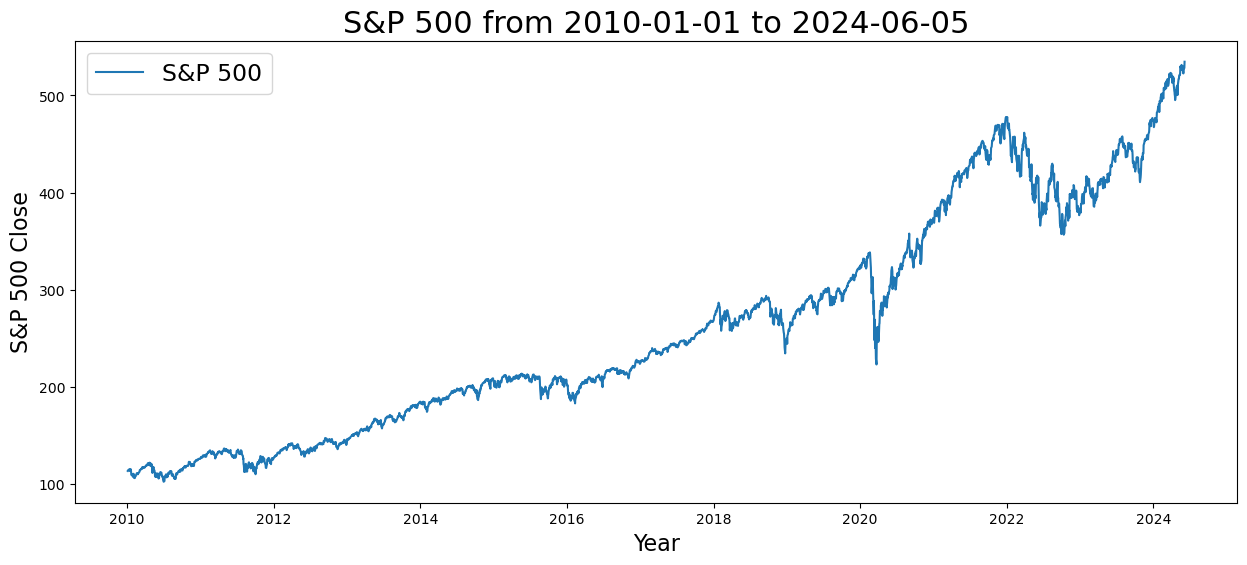

In [4]:
#
## look at the dataset
#

print(df.shape,'\n\n', df.columns,'\n\n', df.head())

end=df.index.max().strftime("%Y-%m-%d")

series='Close'

# data lineplot >>
plt.figure(figsize=(15, 6))
plt.title(stockname+' from '+str(start)+' to '+str(end),
          fontsize=22)
sns.lineplot(data=df[series], label=stockname)
plt.legend(fontsize=17, loc='best')
plt.ylabel(stockname+' '+series, fontsize=16)
plt.xlabel('Year', fontsize=16)

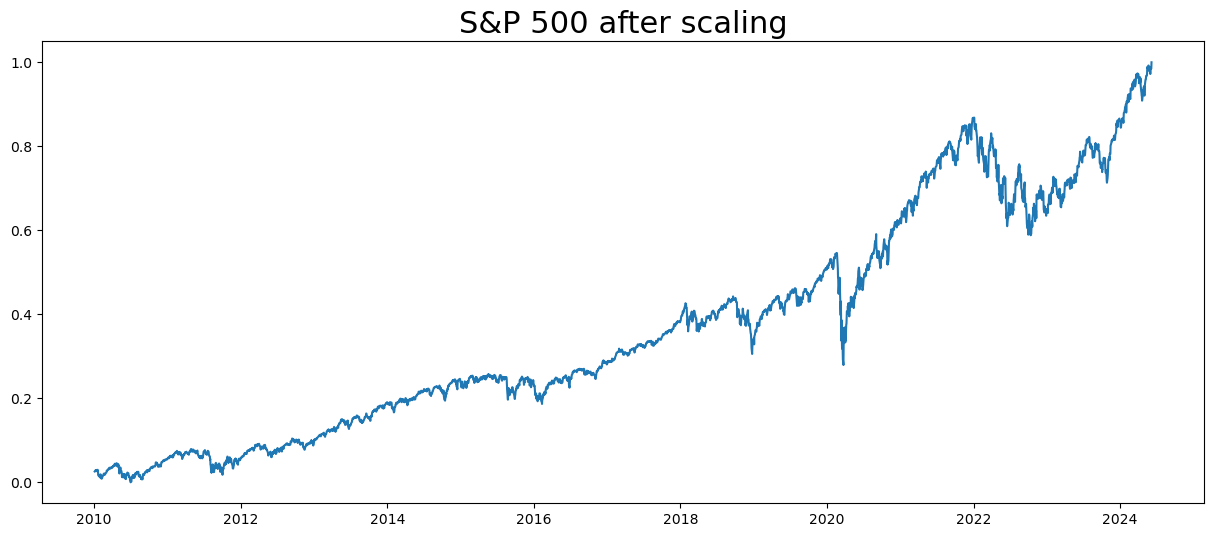

In [5]:
#
## Scaling the data
#

# Feature Selection - Only Close Data
train_df = df.filter([series])
data_unscaled = train_df.values

# Transform features by scaling each feature
#  to a range between 0 and 1
mmscaler = MinMaxScaler(feature_range=(0, 1))
np_data = mmscaler.fit_transform(data_unscaled)

# Lineplot after scaling >>
plt.figure(figsize=(15, 6))
plt.title(stockname+' after scaling', fontsize=22)
plt.plot(df.index, np_data)

(-0.5, 1191.5, 598.5, -0.5)

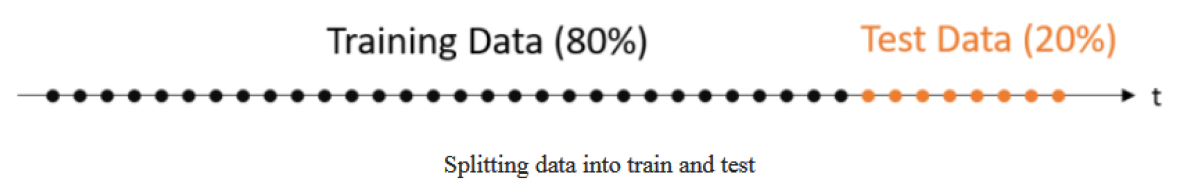

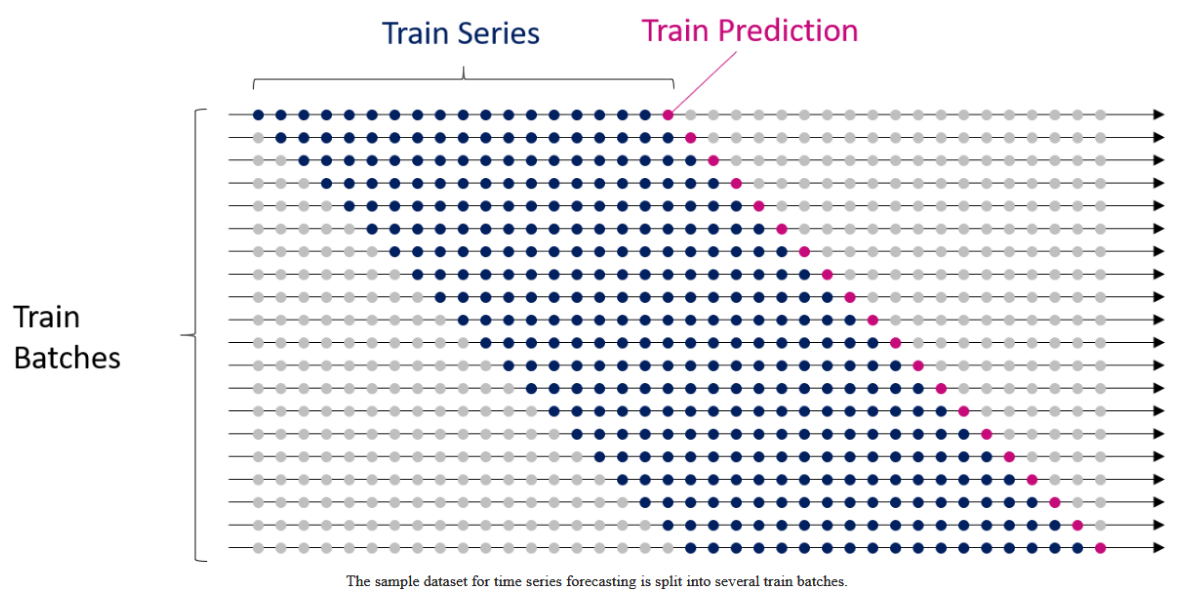

In [6]:
#
## Creating the Input Shape
#

# an idea about >>
img1 = mpimg.imread('splitting_data.PNG')
plt.figure(figsize=(15,10))
plt.imshow(img1)
plt.axis('off')

img1 = mpimg.imread('train_batches.PNG')
plt.figure(figsize=(15,10))
plt.imshow(img1)
plt.axis('off')


In [7]:
### Data Preprocessing >>

# Set the sequence length
# - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = train_df.columns.get_loc(series)
print('\nFeature index is', index_Close)

# Split the data into train and test data sets >>>
#  We get 80% of the data to train the model
train_data_len = math.ceil(np_data.shape[0] * 0.8)
#  Creating the training and test data sets >>
train_data = np_data[0:train_data_len, :]
test_data = np_data[train_data_len - sequence_length:, :]

# The RNN needs data with the format of
#  [samples, time steps, features]
# Here, we create N samples,
#  sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, train_df):
    x, y = [], []
    data_len = train_df.shape[0]
    for i in range(sequence_length, data_len):
      # sequence_length values 0-sequence_length * columsn >>
      x.append(train_df[i-sequence_length:i,:])
      # prediction values for validation (3rd column = Close),
      #  for single-step prediction >>
      y.append(train_df[i, index_Close])
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is:
#  (rows, training_sequence, features) (prediction value, )
print('Train shapes:', x_train.shape, y_train.shape)
print('Test shapes:', x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample
#  should equal the first prediction value
print('Prediction and input values match >>>')
print(x_test[1][sequence_length-1][index_Close])
print(y_test[0])


Feature index is 0
Train shapes: (2854, 50, 1) (2854,)
Test shapes: (726, 50, 1) (726,)
Prediction and input values match >>>
0.7463408207497804
0.7463408207497804


(-0.5, 1234.5, 562.5, -0.5)

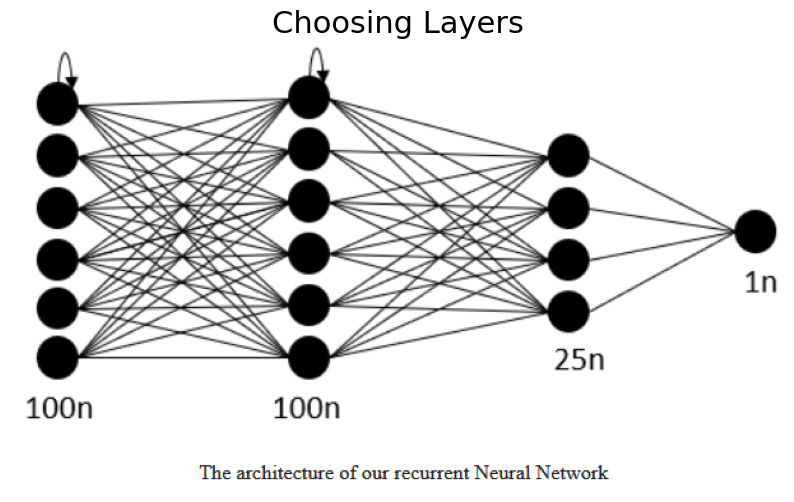

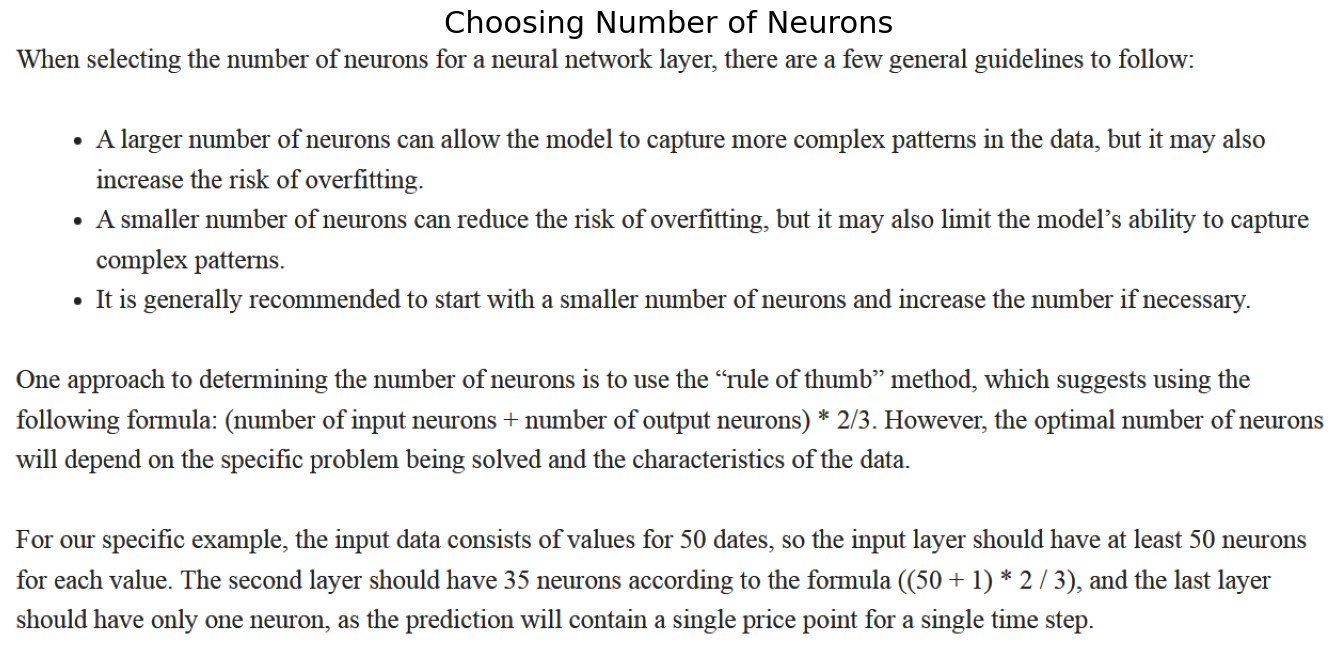

In [8]:
#
## Designing the Model Architecture
#

# Choosing Layers
# an idea about >>
img1 = mpimg.imread('layers.PNG')
plt.figure(figsize=(10,7))
plt.title('Choosing Layers', fontsize=22)
plt.imshow(img1)
plt.axis('off')

# Choosing the Number of Neurons
# an idea about >>
img1 = mpimg.imread('neurons.PNG')
plt.figure(figsize=(17,15))
plt.title('Choosing Number of Neurons', fontsize=22)
plt.imshow(img1)
plt.axis('off')


In [9]:
# Configure the neural network model

model = Sequential()

neurons = sequence_length

# Model with sequence_length Neurons 
#  inputshape = sequence_length Timestamps
model.add(LSTM(neurons, return_sequences=True,
               input_shape=(x_train.shape[1], 1))) 
model.add(LSTM(neurons, return_sequences=False))
model.add(Dense(35, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\mixas\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
#
## Train the Univariate Model
#

# Training the model >>
model.fit(x_train, y_train, batch_size=16, epochs=25)

Epoch 1/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0149
Epoch 2/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.0338e-04
Epoch 3/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.0284e-04
Epoch 4/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.5629e-04
Epoch 5/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.8314e-04
Epoch 6/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.3666e-04
Epoch 7/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.3185e-04
Epoch 8/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.3040e-04
Epoch 9/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 1.2515e-04
Epoch 10/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.4782e-04
Epoch 11/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.0947e-04
Epoch 12/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.2676e-04
Epoch 13/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 9.7780e-05
Epoch 14/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.

In [11]:

#
## Creating the Univariate Stock Market Forecasting
#

# Get the predicted values >>
y_pred_scaled = model.predict(x_test)
y_pred = mmscaler.inverse_transform(y_pred_scaled)
y_test_unscaled = mmscaler.inverse_transform(y_test.reshape(-1, 1))

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step



Mean Absolute Error (MAE): 4.23
Mean Squared Error (MSE):  5.46
Mean Absolute Percentage Error (MAPE):    1.0 %
Median Absolute Percentage Error (MDAPE): 0.76 %

Mean Value of Residuals: -0.89 (predictions lie above the valid values)



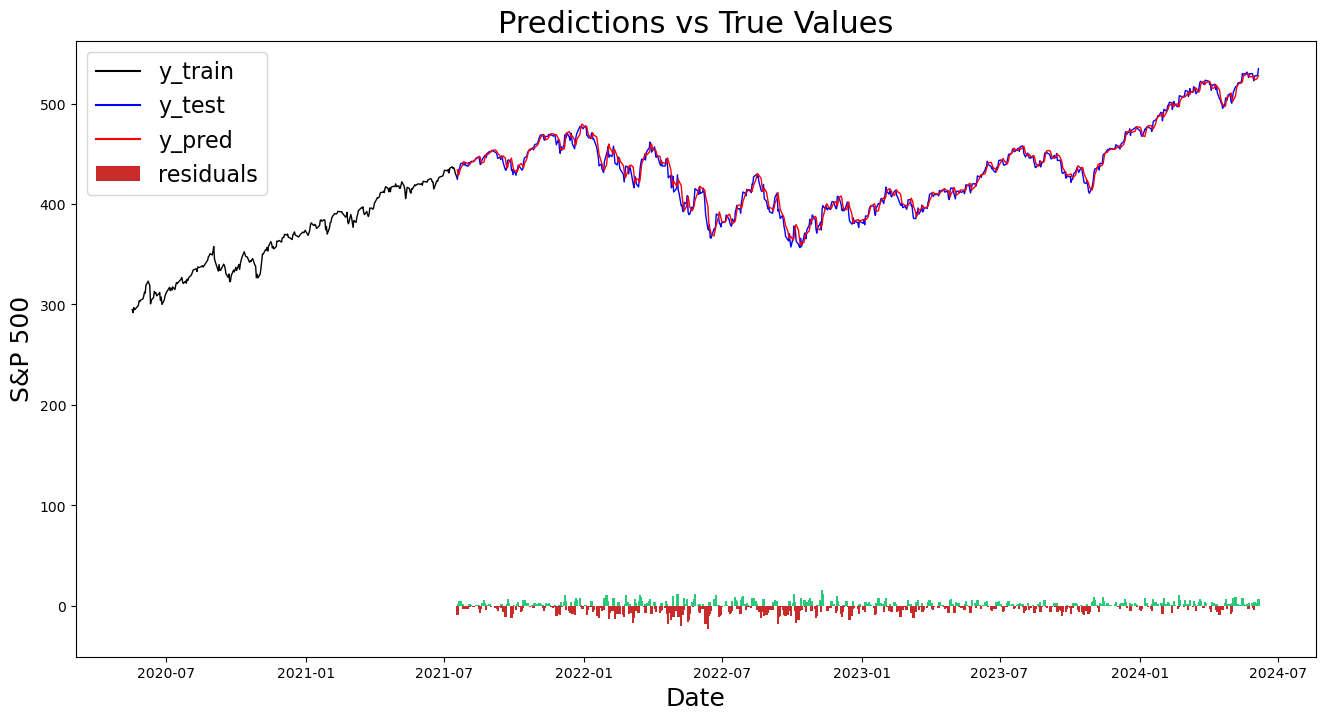

In [14]:
#
## Evaluate Model Performance >>
#

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'\nMean Absolute Error (MAE): {np.round(MAE, 2)}')
# Mean Squared Error (MSE)
MSE = mean_squared_error(y_test_unscaled, y_pred, squared=False)
print(f'Mean Squared Error (MSE):  {np.round(MSE, 2)}')
# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE):    {np.round(MAPE, 2)} %')
# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

#
## Visualizing test predictions >>
#
#  helps in the process of evaluating the model >>
# The date from which on the date is displayed
display_start_date = "2020-05-15" 

# Add the difference between the valid and predicted prices
train = pd.DataFrame(train_df[:train_data_len + 1]).rename(columns={series: 'y_train'})
valid = pd.DataFrame(train_df[train_data_len:]).rename(columns={series: 'y_test'})
valid.insert(1, "y_pred", y_pred, True)
valid.insert(1, "residuals", valid["y_test"] - valid["y_pred"], True)
df_union = pd.concat([train, valid])

mres = np.mean(valid.residuals)
if mres>0:
  pos='below'
else:
  pos='above'
print(f'\nMean Value of Residuals: {np.round(mres, 2)} (predictions lie {pos} the valid values)\n')

# Zoom into a closer timeframe
df_union_zoom = df_union[df_union.index > display_start_date]

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(16, 8), sharex=True)
plt.title("Predictions vs True Values", fontsize=22)
#sns.set_palette(["#090364", "#1960EF", "#EF5919"])
plt.ylabel(stockname, fontsize=18)
plt.xlabel('Date', fontsize=18)
sns.lineplot(data=df_union_zoom[['y_train', 'y_test', 'y_pred']],
             linewidth=1.0, dashes=False, palette=['k','b','r'])

# Create the barplot for the absolute errors
df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["residuals"].dropna()]
ax1.bar(height=df_union_zoom['residuals'].dropna(),
        x=df_union_zoom['residuals'].dropna().index, width=3,
        label='residuals', color=df_sub)
plt.legend(loc='best', fontsize=16)

In [15]:
#
## Stock Market Prediction – Predicting a Single Day Ahead
#

# Get fresh data
df_new = df.filter([series])

# Get the last N day closing price values and scale the data to be values between 0 and 1
last_days_scaled = mmscaler.transform(df_new[-sequence_length:].values)

# Create an empty list and Append past n days
X_test = []
X_test.append(last_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price, undo the scaling and output the predictions
pred_price = model.predict(X_test)
pred_price_unscaled = mmscaler.inverse_transform(pred_price)

# Print last price and predicted price for the next day
price_today = np.round(df_new['Close'][-1], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
#percent_change = np.round((predicted_price * 100)/price_today - 100, 2)
percent_change = np.round(100 * (predicted_price/price_today - 1), 2)

print(f'Price for {stockname} at {end} was {price_today}',
 '\nForecast for the next day is', predicted_price,
 f'\nDeviation is {percent_change}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Price for S&P 500 at 2024-06-05 was 534.67 
Forecast for the next day is 531.81 
Deviation is -0.53%


In [16]:
!pip install transformers

  Obtaining dependency information for sentencepiece from https://files.pythonhosted.org/packages/a2/f6/587c62fd21fc988555b85351f50bbde43a51524caafd63bc69240ded14fd/sentencepiece-0.2.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/991.5 kB ? eta -:--:--
   - -------------------------------------- 30.7/991.5 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 102.4/991.5 kB 1.5 MB/s eta 0:00:01
   ---------- ----------------------------- 266.2/991.5 kB 2.3 MB/s eta 0:00:01
   ---------------------- ----------------- 563.2/991.5 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------  983.0/991.5 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 991.5/991.5 kB 4.5 MB/s eta 0:00:00


In [35]:
!pip install nltk
!pip install networkx

^C


In [37]:
import webbrowser
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
import os

In [38]:
def read_article(file_name):
    file = open(file_name, "r")
    filedata = file.readlines()
    article = filedata[0].split(". ")
    sentences = []

    for sentence in article:
#       print(sentence)
       sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    
    return sentences

def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)
 
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix


def generate_summary(file_name, sum_length=5, language='russian'):
    nltk.download("stopwords", quiet=True)
    stop_words = stopwords.words(language)
#    display(stop_words)
    summarize_text = []

    # Step 1 - Read text and split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
#    print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(sum_length):
      summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize text
    sum_t = ". ".join(summarize_text)
#    print("\n*** Text summary >>>\n", sum_t)
    return sum_t

In [45]:
# define Russian text file here >>>
text="Elbrus.txt"
#text="Bunin.txt"
## generate summary >>
# default language is 'russian',
# number 1 below is sum_length (number of sentences in result)
summary = generate_summary( text, 2)

print("\n*** Text summary >>>\n", summary, "\n")



*** Text summary >>>
 Р§Р°СЃС‚Рѕ Сѓ РјРµРЅСЏ Р±С‹РІР°СЋС‚ РїСЂРѕР±Р»РµРјС‹ РёР·-Р·Р° РјРѕРµР№ С„РѕР±РёРё: СЏ РґР°Р»РµРєРѕ РЅРµ СЃРїРѕСЂС‚СЃРјРµРЅ, Р° С…РѕРґРёС‚СЊ РёРЅРѕРіРґР° РїСЂРёС…РѕРґРёС‚СЃСЏ Рё РЅР° РґРІРµРЅР°РґС†Р°С‚С‹Р№, Рё РЅР° СЃРµРјРЅР°РґС†Р°С‚С‹Р№ СЌС‚Р°Р¶Рё. РљРѕРЅРµС‡РЅРѕ, РЅР° РЅСѓР¶РЅС‹Р№ СЌС‚Р°Р¶ СЏ СЃРєРѕСЂРµРµ РґРѕРїРѕР»Р·Р°СЋ, Р° РЅРµ РґРѕС…РѕР¶Сѓ, РЅРѕ РЅРёРєР°Рє РЅРµ РјРѕРіСѓ Р·Р°СЃС‚Р°РІРёС‚СЊ СЃРµР±СЏ РІРѕР№С‚Рё РІ СЌС‚Сѓ С‚РµСЃРЅСѓСЋ РєР°Р±РёРЅРєСѓ 



In [43]:
# define English text file here >>>

text="Yahoo.txt"

## generate summary >>
# sum_length is number of sentences in result,
# default language='russian'
summary = generate_summary( text, sum_length=2, language='english')

print("\n*** Text summary >>>\n", summary, "\n")



*** Text summary >>>
 For the fourth quarter of 2016, the Change in Revenue Presentation contributed $302 million to each of GAAP revenue and cost of revenue – TAC. For the full year of 2016, the Change in Revenue Presentation contributed $812 million to each of GAAP revenue and cost of revenue – TAC 



In [46]:
!pip install pdfminer.six

  Obtaining dependency information for pdfminer.six from https://files.pythonhosted.org/packages/eb/9c/e46fe7502b32d7db6af6e36a9105abb93301fa1ec475b5ddcba8b35ae23a/pdfminer.six-20231228-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.6 MB 1.3 MB/s eta 0:00:05
    --------------------------------------- 0.1/5.6 MB 1.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.3/5.6 MB 2.7 MB/s eta 0:00:02
   ---- ----------------------------------- 0.6/5.6 MB 4.1 MB/s eta 0:00:02
   ------- -------------------------------- 1.1/5.6 MB 6.4 MB/s eta 0:00:01
   ----------- ---------------------------- 1.6/5.6 MB 8.1 MB/s eta 0:00:01
   ----------- ---------------------------- 1.6/5.6 MB 8.1 MB/s eta 0:00:01
   -------------------- ------------------- 2.9/5.6 MB 9.1 MB/s eta 0:00:01
   ----------------------------- ---------- 4.1/5.6 MB 12.0 MB/s eta 0:00:01
   -------------------------------

In [47]:
import webbrowser
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
import os
from pdfminer.high_level import extract_text
import requests

In [48]:
def read_article(file_name):
    file = open(file_name, "r", encoding="utf-8")
    filedata = file.readlines()
    article = filedata[0].split(". ")
    sentences = []

    for sentence in article:
#       print(sentence)
       sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    
    return sentences

def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)
 
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix


def generate_summary(file_name, sum_length=5, language='russian'):
    nltk.download("stopwords", quiet=True)
    stop_words = stopwords.words(language)
#    display(stop_words)
    summarize_text = []

    # Step 1 - Read text and split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
#    print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(sum_length):
      summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize text
    sum_t = ". ".join(summarize_text)
#    print("\n*** Text summary >>>\n", sum_t)
    return sum_t

In [49]:
tmpFile = "tmp"

# write URL of pdf to read !!! >>
lang='english'
URL = "https://www.brookings.edu/wp-content/uploads/2018/08/WP43-8.23.18.pdf" # <- English
lang='russian'
URL = "http://pe.cemi.rssi.ru/pe_2019_56_005-024.pdf"
URL = "https://ej.hse.ru/data/2022/12/07/1714262991/Суринов.pdf"
response = requests.get(URL)

# save pdf >>
open(tmpFile+".pdf", "wb").write(response.content)

# extract text from pdf >>
text = extract_text(tmpFile+".pdf")

# save text >>
open(tmpFile+".txt", "w", encoding="utf-8").write(text)

81172

In [51]:
# remove carriage returns >>
with open(tmpFile+".txt", 'r', encoding="utf-8") as file:
    content = file.read()
with open(tmpFile+"_.txt", 'w', encoding="utf-8") as file:
  content = content.replace('\n', '')
  content = content.replace('-', '')
  file.write(content)
        
# get summary >>
summary=generate_summary(tmpFile+"_.txt",sum_length=3,language=lang)

# print summary >>
print("\n*** Text summary >>>\n", summary, "\n")
# save summary >>
open(tmpFile+"_sum.txt", "w", encoding="utf-8").write(summary)



*** Text summary >>>
  Основываясь  на  анализе  различий  в  доходах  жителей  на  основе данных  о  более 10 тысячах городских центрах, расположенных в 168 странах мира, была выявлена зависимость концентрации городского населения от уровня душевого дохода. Для крупных городских агломераций США индекс паритетов региональных цен (Regional Price  Parities  by  MSA2019Metro)  варьировался  от  82,7  до  117,9%  со  средним  95,2%  и коэффициентом вариации 6,2%. Далее были проведены расчеты по корректировке личных доходов населения на территориальные различия в стоимости жизни, с использованием региональных паритетов покупательной способности доллара США, доступных на сайте Бюро экономического анализа  Министерства  коммерции  США  по  крупным  городским  агломерациям14 



755

In [52]:
import requests
import apimoex
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import webbrowser
from sklearn.preprocessing import MinMaxScaler

In [53]:
import math # <- mathematical functions
# Deep learning library, used for neural networks >>
from tensorflow.keras import Sequential
# Deep learning classes for recurrent
#  and regular densely-connected layers >>
from tensorflow.keras.layers import LSTM, Dense
# EarlyStopping during model training >>
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
# Packages for measuring model performance / errors >>
from sklearn.metrics import mean_absolute_error

In [55]:
api_url='https://iss.moex.com/iss/statistics/engines/stock/markets/index/analytics/IMOEX.json'
with requests.Session() as session:
  data = apimoex.ISSClient(session, api_url).get_all()

df_tcr = pd.DataFrame(data['analytics'])
print(df_tcr)

   indexid   tradedate ticker  shortnames secids  weight  tradingsession
0    IMOEX  2024-06-06   AFKS  Система ао   AFKS    0.86               3
1    IMOEX  2024-06-06   AFLT    Аэрофлот   AFLT    0.80               3
2    IMOEX  2024-06-06   AGRO    AGRO-гдр   AGRO    0.90               3
3    IMOEX  2024-06-06   ALRS   АЛРОСА ао   ALRS    1.31               3
4    IMOEX  2024-06-06   BSPB      БСП ао   BSPB    0.43               3
5    IMOEX  2024-06-06   CBOM      МКБ ао   CBOM    0.62               3
6    IMOEX  2024-06-06   CHMF    СевСт-ао   CHMF    2.50               3
7    IMOEX  2024-06-06   ENPG  ЭН+ГРУП ао   ENPG    0.41               3
8    IMOEX  2024-06-06   FEES     Россети   FEES    0.42               3
9    IMOEX  2024-06-06   FIVE    FIVE-гдр   FIVE    1.10               3
10   IMOEX  2024-06-06   FLOT  Совкомфлот   FLOT    0.60               3
11   IMOEX  2024-06-06   GAZP  ГАЗПРОМ ао   GAZP    9.04               3
12   IMOEX  2024-06-06   GLTR    GLTR-гдр   GLTR   

In [56]:
with requests.Session() as session:
  data = apimoex.ISSClient(session, api_url).get_all()

df_tcr = pd.DataFrame(data['analytics'])
print(df_tcr)

   indexid   tradedate ticker  shortnames secids  weight  tradingsession
0    IMOEX  2024-06-06   AFKS  Система ао   AFKS    0.86               3
1    IMOEX  2024-06-06   AFLT    Аэрофлот   AFLT    0.80               3
2    IMOEX  2024-06-06   AGRO    AGRO-гдр   AGRO    0.90               3
3    IMOEX  2024-06-06   ALRS   АЛРОСА ао   ALRS    1.31               3
4    IMOEX  2024-06-06   BSPB      БСП ао   BSPB    0.43               3
5    IMOEX  2024-06-06   CBOM      МКБ ао   CBOM    0.62               3
6    IMOEX  2024-06-06   CHMF    СевСт-ао   CHMF    2.50               3
7    IMOEX  2024-06-06   ENPG  ЭН+ГРУП ао   ENPG    0.41               3
8    IMOEX  2024-06-06   FEES     Россети   FEES    0.42               3
9    IMOEX  2024-06-06   FIVE    FIVE-гдр   FIVE    1.10               3
10   IMOEX  2024-06-06   FLOT  Совкомфлот   FLOT    0.60               3
11   IMOEX  2024-06-06   GAZP  ГАЗПРОМ ао   GAZP    9.04               3
12   IMOEX  2024-06-06   GLTR    GLTR-гдр   GLTR   

In [92]:
# get data >>

tcr1=df_tcr.ticker[1]  #'AFLT'  # <- Аэрофлот
tcr2=df_tcr.ticker[28] #'PIKK'  # <- ПИК AO
tcr3=df_tcr.ticker[39] #'SNGS' # <- Сургутнефтегаз

# tickers to get data >>
tickers=[ tcr1, tcr2, tcr3 ] # <- list of considered features

df_long=pd.DataFrame(columns=['tcr'])

In [93]:
start='2020-12-01' # <- first day to get data

# trade history for tickers >>
for tcr in tickers:
  print(tcr, end=" ")
  with requests.Session() as session:
    new_row = pd.Series({'tcr': tcr})
    df_long=pd.concat( [df_long, new_row.to_frame().T,
      pd.DataFrame( apimoex.get_board_history(session,
                                    tcr, start=start) )] )

# fill tcr NaN values with the previous row values >>
df_long.tcr.fillna(method='ffill', inplace=True)
# drop rows with NaN TRADEDATE >>
df_long.dropna(subset='TRADEDATE', inplace=True)

print('\n\n', df_long, '\n')
df_long.info()
'''
BOARDID	Код режима	Идентификатор режима торгов, shares are indicated by TQBR
CLOSE	Последняя	Цена последней сделки
VOLUME	Объем, шт.	Объем сделок за день, штук ценных бумаг
VALUE	Объем	Объем сделок за день
'''
print('\nCount NaN values:\n', df_long.isnull().sum() )

AFLT PIKK SNGS 

       tcr BOARDID   TRADEDATE   CLOSE       VOLUME         VALUE
0    AFLT    TQBR  2020-12-01  72.180   18647290.0  1.342402e+09
1    AFLT    TQBR  2020-12-02  72.500   15801710.0  1.139265e+09
2    AFLT    TQBR  2020-12-03  74.000   34266650.0  2.520719e+09
3    AFLT    TQBR  2020-12-04  74.140   36948050.0  2.745979e+09
4    AFLT    TQBR  2020-12-07  74.000   25689540.0  1.907263e+09
..    ...     ...         ...     ...          ...           ...
886  SNGS    TQBR  2024-05-30  29.490   53272300.0  1.603274e+09
887  SNGS    TQBR  2024-05-31  28.580   75185100.0  2.195823e+09
888  SNGS    TQBR  2024-06-03  28.430  154504300.0  4.301858e+09
889  SNGS    TQBR  2024-06-04  28.865   75873700.0  2.161693e+09
890  SNGS    TQBR  2024-06-05  28.640   58407200.0  1.685248e+09

[2673 rows x 6 columns] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2673 entries, 0 to 890
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------

AFLT PIKK SNGS 
Number of missings in columns >>>
 AFLT    18
PIKK    18
SNGS    18
date     0
dtype: int64


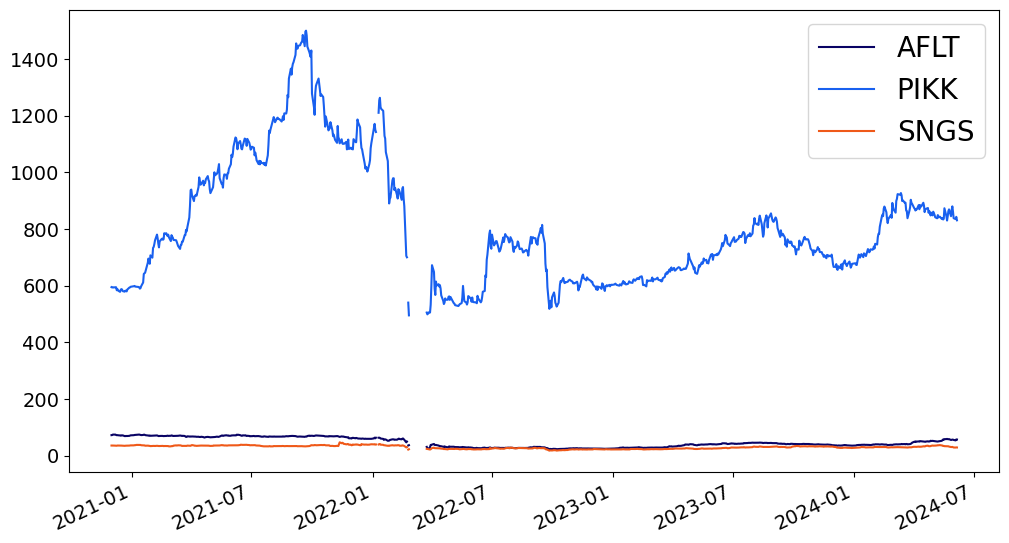

In [94]:
ind='CLOSE' # <- variables of interest

# put variables of interest in one dataframe >>
df=pd.DataFrame()

for tcr in tickers:
  print(tcr, end=" ")
  df = df.assign(col=df_long[ind][df_long.tcr==tcr].values)
  df.rename(columns={'col':tcr}, inplace=True)

df = df.assign(date=df_long['TRADEDATE'][df_long.tcr==tcr].values)

print('\nNumber of missings in columns >>>\n', df.isnull().sum())

df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)

# data acquaintance >>
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 14})
plt.xticks(rotation=25, ha='right')
for tcr in tickers:
  plt.plot(df[tcr], label=tcr)
  plt.legend(loc='best', fontsize=20)

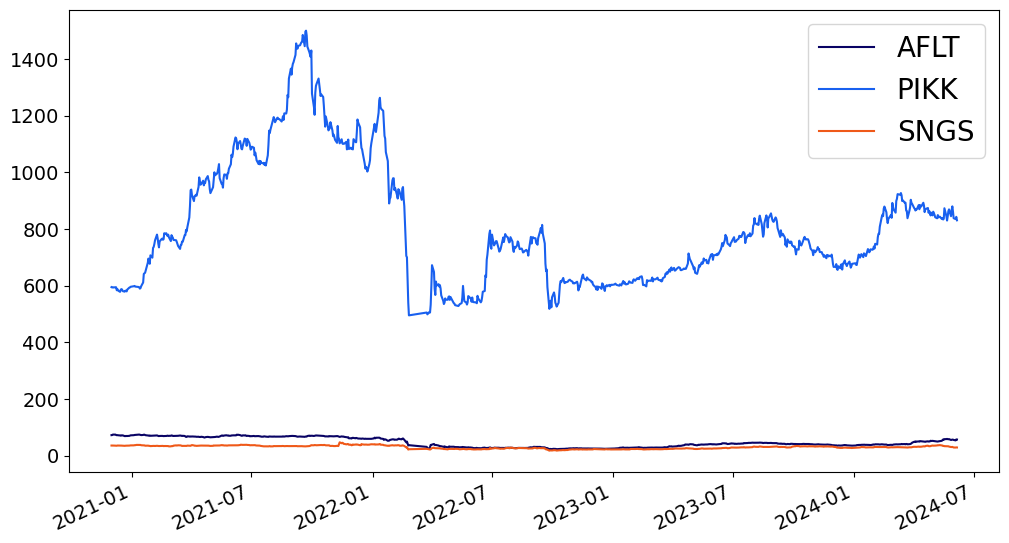

In [95]:
df=df.dropna()

plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 14})
plt.xticks(rotation=25, ha='right')
for tcr in tickers:
  plt.plot(df[tcr], label=tcr)
  plt.legend(loc='best', fontsize=20)

In [96]:
#
## Preprocessing and Feature Selection
#

# feature to be predicted >>
Close = tcr3

# dataframe with prediction column >>
df_ext = df.copy()
df_ext['Prediction'] = df_ext[Close]

# get the number of rows in data >>
nrows = df.shape[0]

# convert data to numpy values >>
np_data_unscaled = np.array(df)

# transform data by scaling each feature to range [0,1] >>
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

print('\nmin & max unscaled: ', min(np_data_unscaled[:,2]),
                            ' ' , max(np_data_unscaled[:,2]),
      '\nmin & max scaled: ', min(np_data_scaled[:,2]),
                            ' ' , max(np_data_scaled[:,2]))


# create separate scaler for scaling predictions >>
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(df_ext[Close])
np_Close_scaled = scaler_pred.fit_transform(df_Close)


min & max unscaled:  17.35   46.87 
min & max scaled:  0.0   0.9999999999999999


In [97]:
# timeframe used to make a single prediction >>
sequence_length = 50

# index of feature (column) to be predicted >>
index_Close = df.columns.get_loc(Close)

# number of rows to train model (80% of the data) >>
# (math.ceil <- округление до ближайшего большего числа)
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# create training and test data >>
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]
'''
# does not use "sequence_length" >>
train_data_, test_data_ = train_test_split(np_data_scaled,
                                         train_size=0.8, shuffle=False)
'''

# The RNN needs data with the format of
#  [samples, time steps, features]
# Here we slice data by “sliding window” >>
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
      x.append(data[i-sequence_length:i,:])
      # prediction values for validation,
      #  for single-step prediction >>
      y.append(data[i, index_Close])
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is:
#  (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample
#  should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(649, 50, 3) (649,)
(174, 50, 3) (174,)
0.5545392953929539
0.5545392953929539


In [98]:
#
## Model Training
#

# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps,
#  each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print('\nn_neurons  x_train.shape[1]  x_train.shape[2] ->',
      n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True,
               input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')


n_neurons  x_train.shape[1]  x_train.shape[2] -> 150 50 3


C:\Users\mixas\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [99]:
# Training the model
epochs = 20
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0308 - val_loss: 0.0067
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0054 - val_loss: 0.0038
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0040 - val_loss: 0.0023
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0039 - val_loss: 0.0020
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0020 - val_loss: 0.0046
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0

In [100]:

#
## Evaluate Model Performance
#

# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Median Absolute Error (MAE): 0.78
Mean Absolute Percentage Error (MAPE): 2.48 %
Median Absolute Percentage Error (MDAPE): 2.15 %


In [101]:
# Add the difference between the valid and predicted prices
train = pd.DataFrame(df_ext[Close][:train_data_len + 1]).rename(columns={Close: 'y_train'})
valid = pd.DataFrame(df_ext[Close][train_data_len:]).rename(columns={Close: 'y_test'})
valid.insert(1, "y_pred", y_pred, True)
valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"],
             True)
df_union = pd.concat([train, valid])

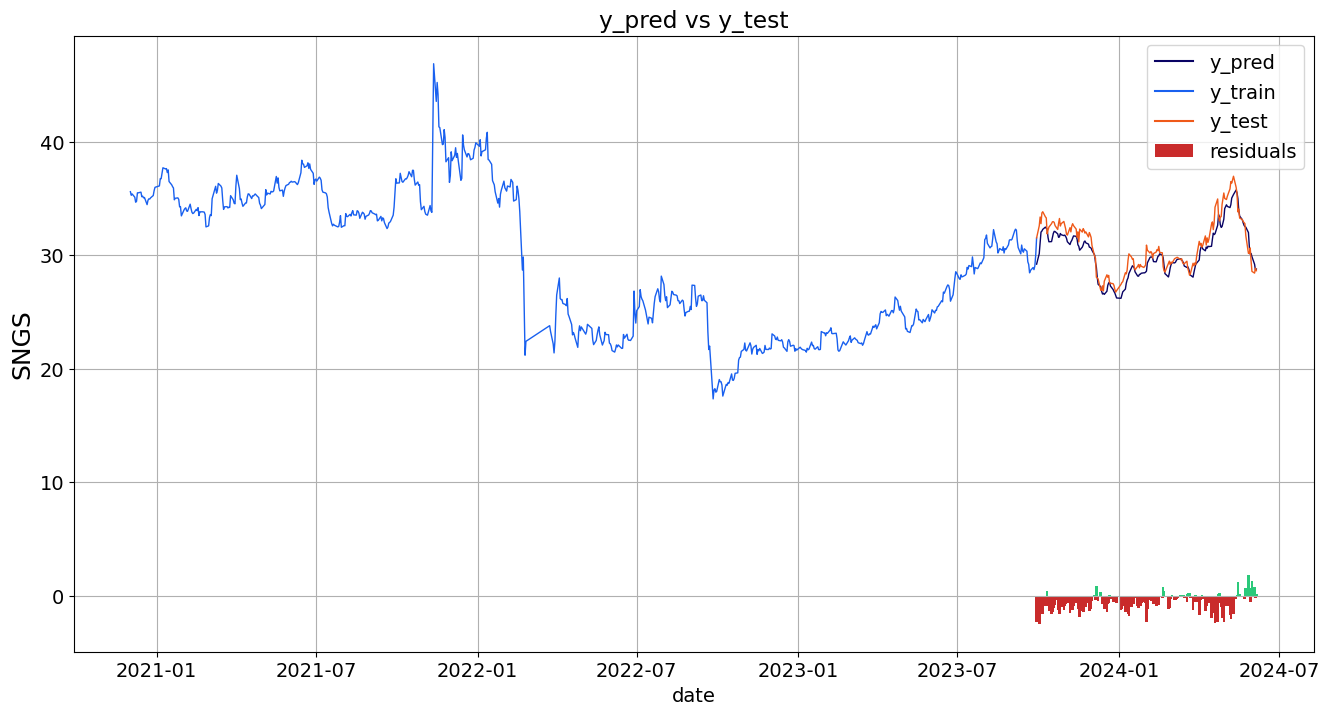

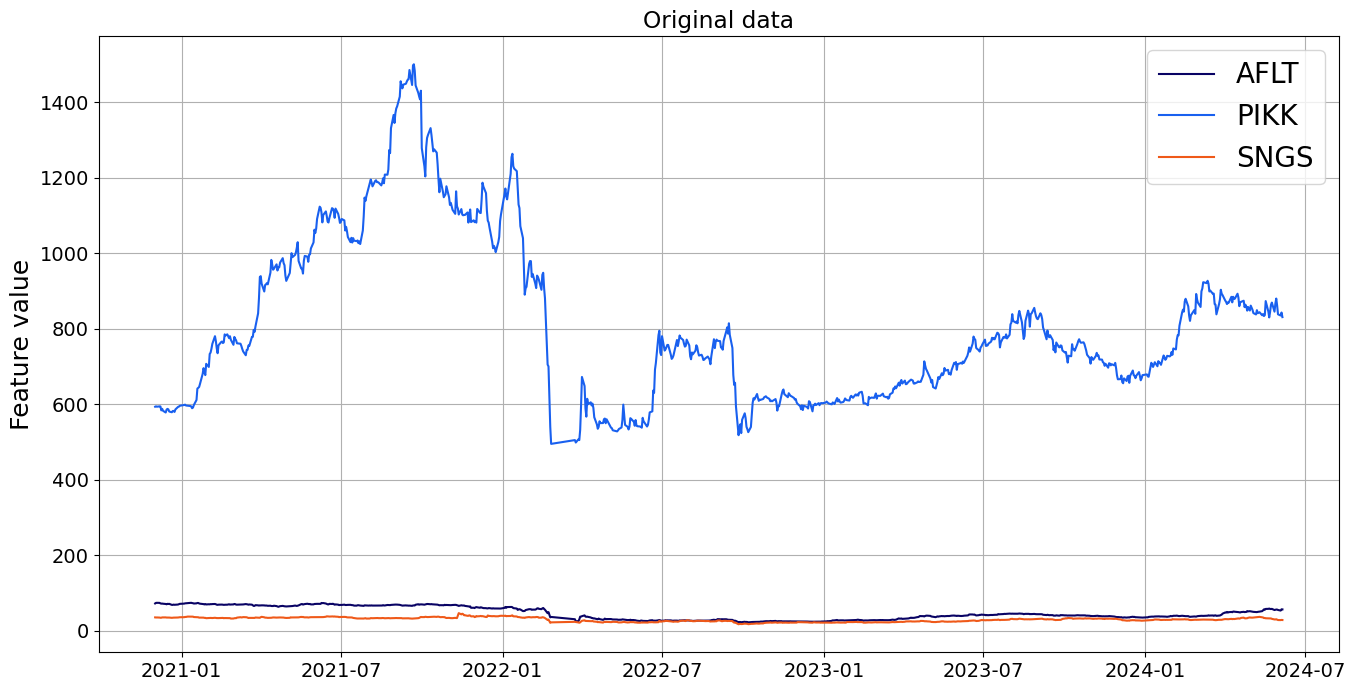

In [102]:
# date from which plot is displayed >>
#display_start_date = "2022-01-01"
#display_start_date = "2021"
display_start_date = start

# Zoom in to a closer timeframe
df_union_zoom = df_union[df_union.index > display_start_date]
#df_union_zoom = df_union.copy()

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("y_pred vs y_test")
plt.ylabel(Close, fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['y_pred', 'y_train', 'y_test']],
             linewidth=1.0, dashes=False, ax=ax1)

# Create the bar plot with the differences
df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["residuals"].dropna()]
ax1.bar(height=df_union_zoom['residuals'].dropna(),
        x=df_union_zoom['residuals'].dropna().index, width=3,
        label='residuals', color=df_sub)
plt.legend(loc="best")
plt.grid()


# original data >>
plt.figure(figsize=(16, 8))
plt.title("Original data")
plt.ylabel('Feature value', fontsize=18)
plt.rcParams.update({'font.size': 14})
plt.grid()
for tcr in tickers:
  plt.plot(df[tcr][df.index > display_start_date], label=tcr)
  plt.legend(loc='best', fontsize=20)

In [103]:
#
## Predict Next Day's Price
#

new_df = df[-sequence_length:]

N = sequence_length

# Get the last N day values and scale the data to be values between 0 and 1
last_N_days = new_df[-sequence_length:].values
last_N_days_scaled = scaler.fit_transform(last_N_days)

# Create an empty list and Append past N days
X_test_new = []
X_test_new.append(last_N_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

# last price and predicted price for the next day
price_today = np.round(new_df[Close][-1:], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
#change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)
change_percent = np.round(100 * (predicted_price/price_today - 1), 2)

end_date =  new_df.index.max().strftime("%Y-%m-%d")
print(f'\nPrice for {Close} at {end_date} is {price_today.iloc[0]}',
 '\nForecast for the next day is', predicted_price,
 f'\nDeviation is {change_percent.iloc[0]}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Price for SNGS at 2024-06-05 is 28.64 
Forecast for the next day is 20.26 
Deviation is -29.26%
